In [1]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import *
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

C:\Users\Spoorthz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (60000, 1, 28, 28) (60000, 10)
Testing data shape :  (10000, 1, 28, 28) (10000, 10)


In [4]:
import keras.utils
from keras.layers.normalization import BatchNormalization
from keras.optimizers import *
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(1, 28, 28), padding='same', name='Conv1'))
convout1 = model.add(Activation('relu'))
model.add(BatchNormalization())
convout2 = model.add(MaxPooling2D(pool_size=(2, 2), strides= (2,2)))
model.add(Conv2D(32, (3, 3), name='Conv2', padding='same'))
convout3 = model.add(Activation('relu'))
model.add(BatchNormalization())
convout4 = model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32,(3,3), name='Conv3', padding='same'))
convout5 = model.add(Activation('relu'))
model.add(Dropout(0.2))
convout6 = model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64,(3,3), name='Conv4',padding='same'))
convout7 = model.add(Activation('relu'))
convout8 = model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
	# Compile model
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics= ['accuracy'])


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_1/MaxPool' (op: 'MaxPool') with input shapes: [?,1,28,16].

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
47600/60000 [======================>.......] - ETA: 9:11 - loss: 0.0233 - acc: 0.9924

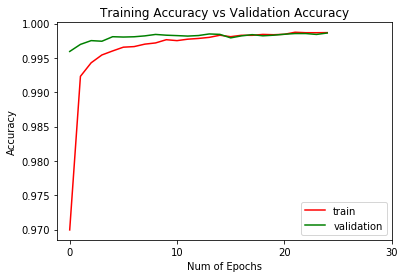

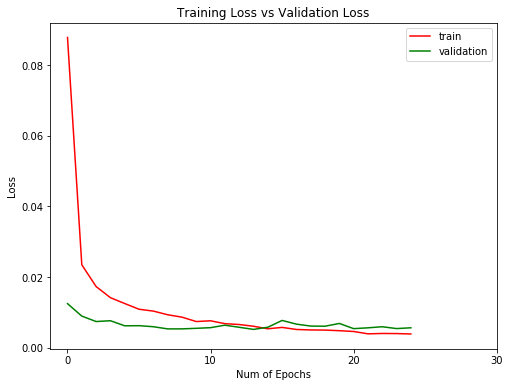

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 31, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 31, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 16, 28, 28)        160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 28, 28)        112       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 14, 14)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 14, 14)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 14, 14)        56        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 7, 7)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 32, 7, 7)          9248      
__________

In [9]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.86%


0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    0    2    0    0    1    0    0    0]
 [   1    1 1021    0    0    0    1    4    4    0]
 [   0    0    1 1007    0    0    0    0    2    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    0    0    7    0  879    2    1    0    2]
 [   3    3    0    0    1    2  949    0    0    0]
 [   0    1    1    0    0    0    0 1025    1    0]
 [   2    1    2    1    1    1    1    0  964    1]
 [   1    0    0    0    7    1    0    2    2  996]]


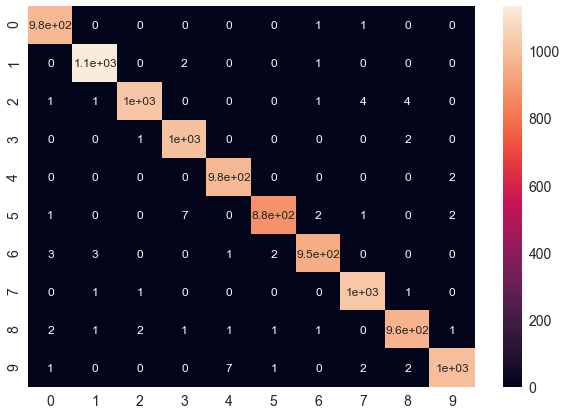

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [3]:
from sklearn.metrics import *
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = loaded_model.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       0.99      1.00      1.00      1135
          2       1.00      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       0.99      1.00      0.99       982
          5       1.00      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      1.00      0.99      1028
          8       0.99      0.99      0.99       974
          9       1.00      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



10000/10000 [==============================] - 14s 1ms/step


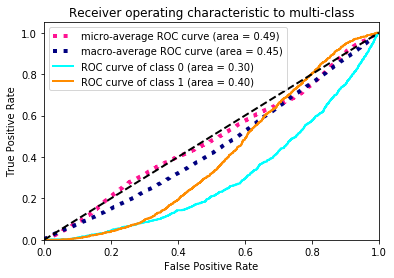

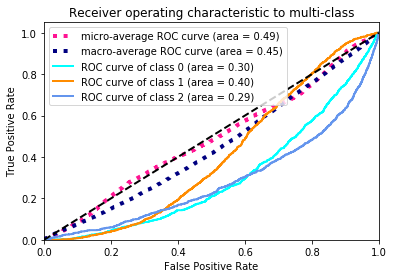

In [54]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 10

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
model_pred = model.predict(X_test, batch_size=200, verbose=1) 
#snn_predicted = np.argmax(snn_pred, axis=1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), model_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'gray', 'pink'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="upper left")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'gray', 'pink'])
for i, color in zip(range(n_classes-7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="upper left")
plt.show()


In [44]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'name': 'Conv1',
   'trainable': True,
   'batch_input_shape': (None, 1, 28, 28),
   'dtype': 'float32',
   'filters': 16,
   'kernel_size': (3, 3),
   'strides': (1, 1),
   'padding': 'same',
   'data_format': 'channels_first',
   'dilation_rate': (1, 1),
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'BatchNormalization',
  'config': {'name': 'batch_normalization_1',
   'trainable': True,
   'axis': -1,
   'momentum': 0.99,
   'epsilon': 0.001,
   'center': True,
   'scale': True,
   'beta_initializer': {'class_name': 'Zeros', 'config': {}},
   'gamma_initia

In [5]:
model.layers[0].get_config()

{'name': 'Conv1',
 'trainable': True,
 'batch_input_shape': (None, 1, 28, 28),
 'dtype': 'float32',
 'filters': 16,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_first',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [8]:
model.count_params()

48020

In [32]:
model.layers[0].count_params()

160

In [8]:
def getActivations(layer,stimuli):
    keep_prob = 1.0
    units = sess.run(layer,feed_dict={X_test:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)
    

In [9]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

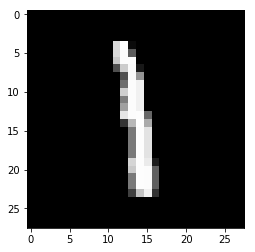

In [30]:
import matplotlib.pyplot as plt
import numpy as np
imageToUse = X_test[29]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

In [4]:
from keras import applications

# build the VGG16 network
model = loaded_model
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [18]:
from keras import layers
import matplotlib.pyplot as plt
def plot_filters(layer, x, y):
    filters = layers.kernel.get_value()
    fig = plt.figure()
    for j in range(len(filters)):
        ax = fig.add_subplot(y,x,j+1)
        ax.matshow(filters[j][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()
    return plt

        

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)